# Support Vector Machine Project

In this project, we'll use the famous iris dataset. This dataset is a multivariate dataset introduced by Sir Ronald Fisher in 1936 as an example of discriminant analysis.

The dataset consists of 50 samples fro each of tree species of Iris (Iris setosa, Iris Virginia, and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

## Get the Data

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## EAD

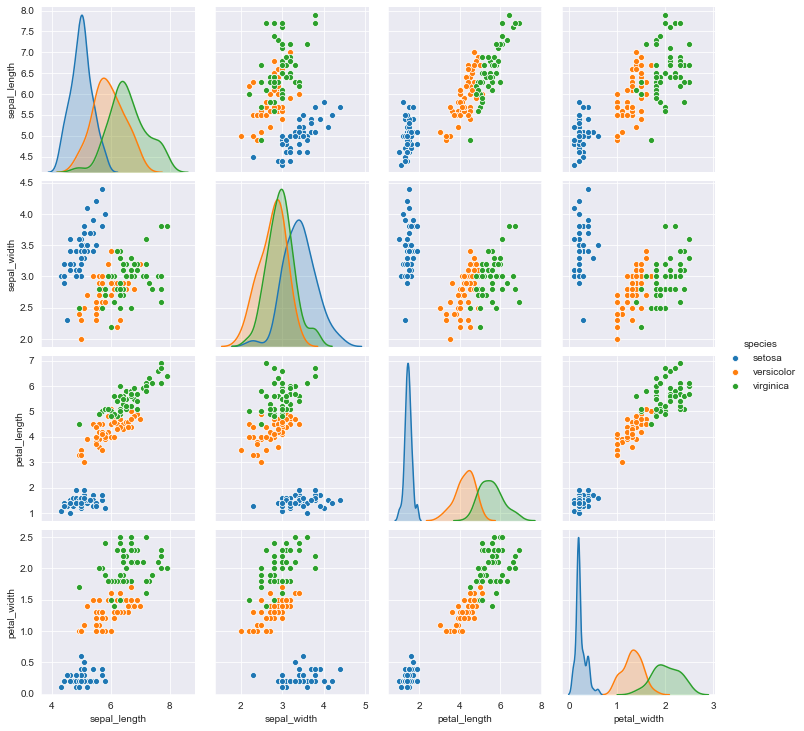

In [5]:
sns.set_style('darkgrid')
sns.pairplot(data=iris, hue='species')

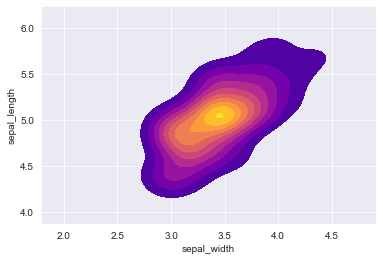

In [8]:
setosa = iris[iris['species'] == 'setosa']

sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'],
                cmap='plasma', shade=True, shade_lowest=False)

## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [46]:
X = iris.drop('species', axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

## Train a Model

Now its time to train a Suppoert Vector Machine Classifier

In [47]:
from sklearn.svm import SVC

In [48]:
svc = SVC()

In [49]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Model Evaluation

In [50]:
predictions = svc.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
print(confusion_matrix(y_test, predictions))

[[23  0  0]
 [ 0 12  0]
 [ 0  1 17]]


In [53]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        23
 versicolor       0.92      1.00      0.96        12
  virginica       1.00      0.94      0.97        18

avg / total       0.98      0.98      0.98        53



We can note that our model is pretty good! Let's see if we can tune the parameters to try to get even better (unlikely, and we probably would be satisfied with these results in real like because the data set is quite small, but I just want we to practice using GridSearch)

## Gridsearch

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

In [56]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.9090909090909091, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.9090909090909091, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.9032258064516129, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8181818181818182, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8181818181818182, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8709677419354839, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=1000, gamma=0.001, score=0.967741935483871, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.9696969696969697, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.9090909090909091, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.9354838709677419, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [57]:
grid_predictions = grid.predict(X_test)

In [58]:
print(confusion_matrix(y_test, grid_predictions))

[[23  0  0]
 [ 0 11  1]
 [ 0  1 17]]


In [59]:
print(classification_report(y_test, grid_predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        23
 versicolor       0.92      0.92      0.92        12
  virginica       0.94      0.94      0.94        18

avg / total       0.96      0.96      0.96        53



In this example, we didn't see any improvement using grid search, but it's important to keep in mind that in bigger datasets it can be a good strategy!